# protostars
## 14- `star_protostars.py` experiment 3 run02
### I. Starfish outcome

`Starfish` with the `star_protostars.py` code with relaxed priors

Full available spectral region

In [1]:
import pandas as pd

```bash
gully at gigayear in ~/GitHub/protostars/sf/exp3/output/bb_absolute/run02 on master [!?]
$ $protostars/code/star_protostars.py --samples=5000 --incremental_save=100
keeping grid as is
Using the user defined prior in $protostars/sf/exp3/output/bb_absolute/run02/user_prior.py
2017 Apr 13,12:26 AM: 99/5000 = 2.0%
2017 Apr 13,12:29 AM: 199/5000 = 4.0%
2017 Apr 13,12:33 AM: 299/5000 = 6.0%
[...]
2017 Apr 13, 3:06 AM: 4699/5000 = 94.0%
2017 Apr 13, 3:09 AM: 4799/5000 = 96.0%
2017 Apr 13, 3:12 AM: 4899/5000 = 98.0%
2017 Apr 13, 3:16 AM:
```

In [2]:
ws = np.load("../sf/exp3/output/bb_absolute/run02/emcee_chain.npy")

In [3]:
burned = ws[:, -1000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [4]:
from matplotlib.ticker import MaxNLocator

In [5]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

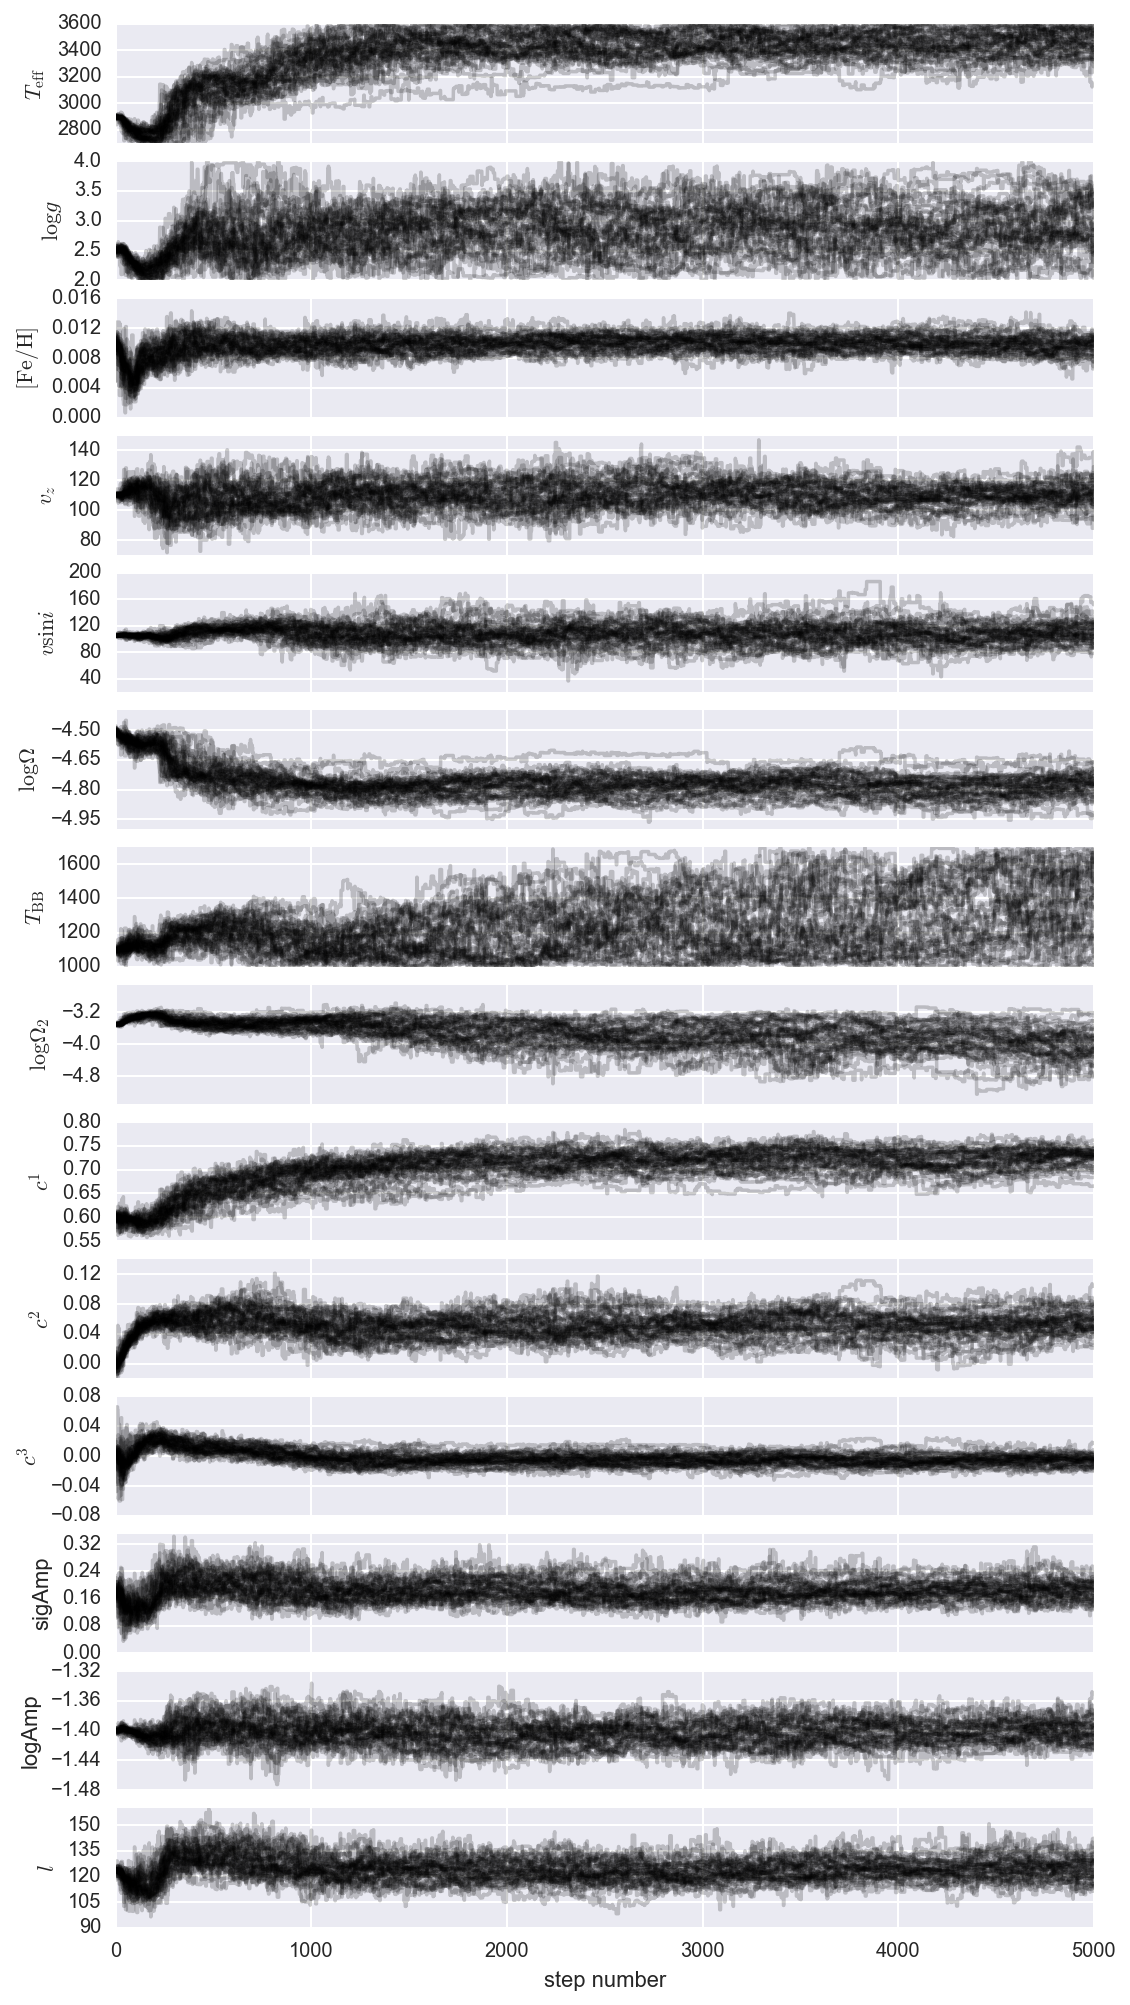

In [6]:
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

In [7]:
np_labs = np.array(label)
np_labs[0:8]

array(['$T_{\\mathrm{eff}}$', '$\\log{g}$', '$[\\mathrm{Fe}/\\mathrm{H}]$',
       '$v_z$', '$v\\sin{i}$', '$\\log{\\Omega}$', '$T_{\\mathrm{BB}}$',
       '$\\log{\\Omega_2}$'], 
      dtype='<U26')

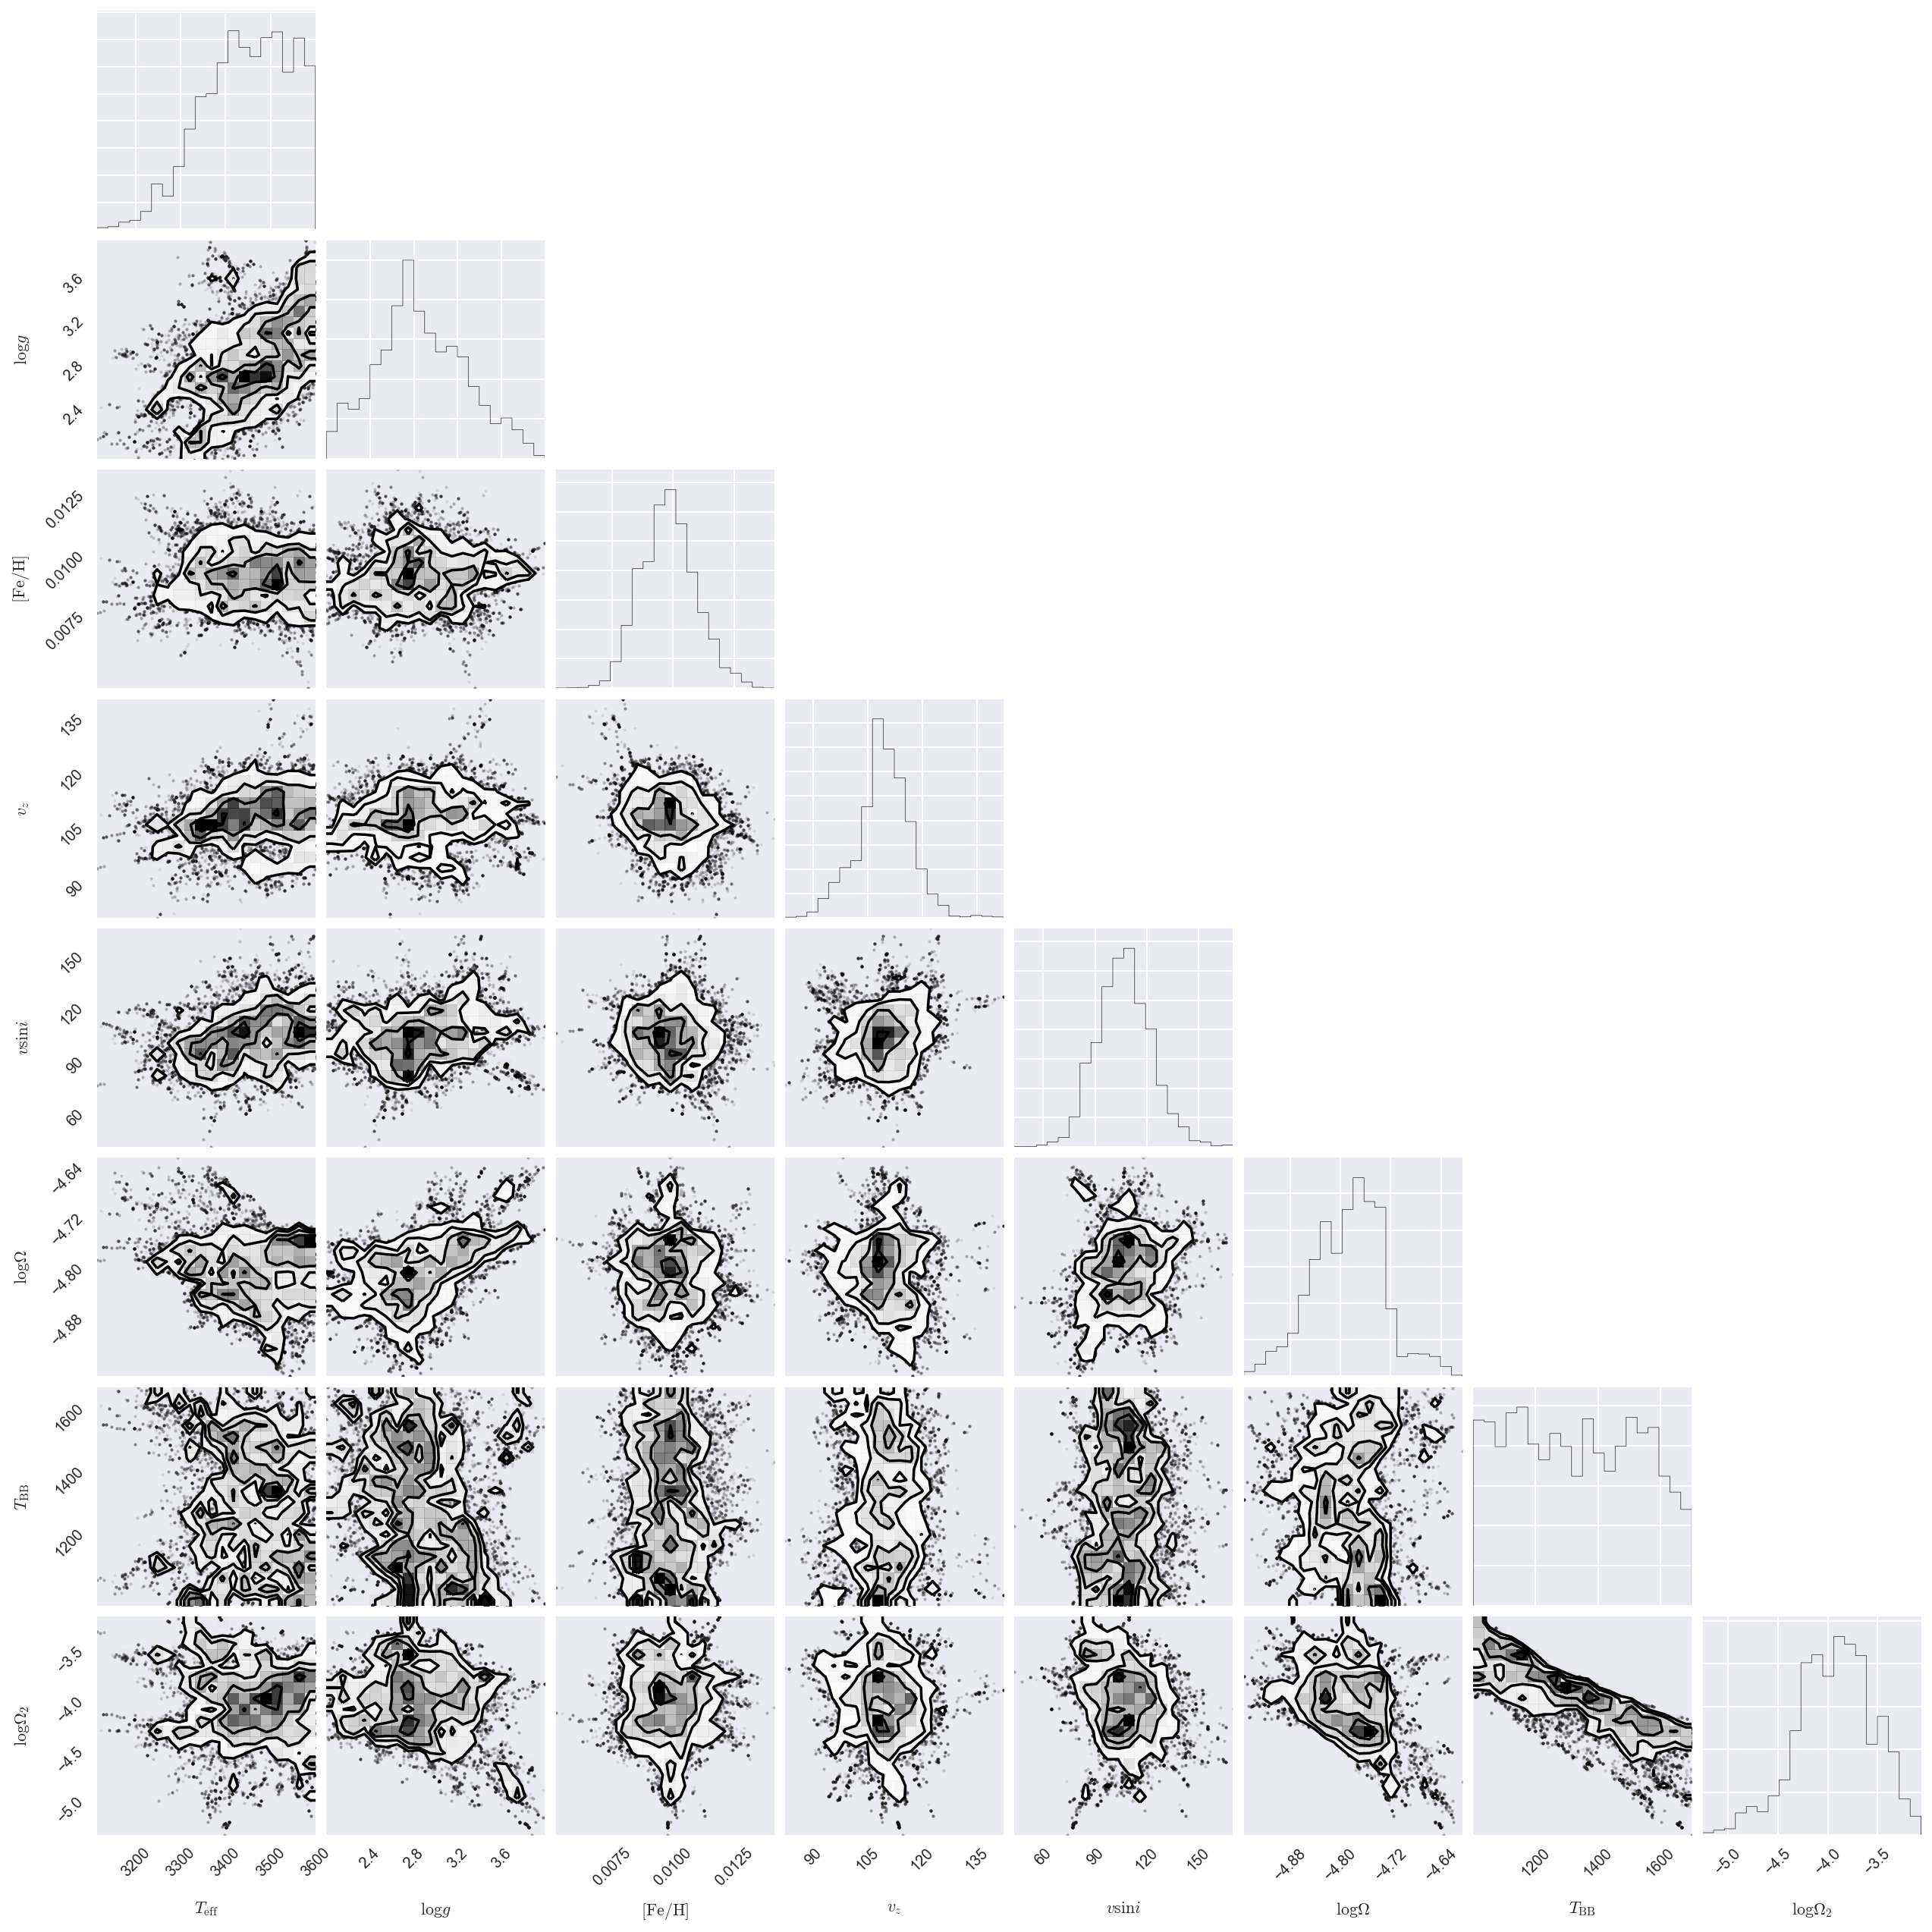

In [8]:
import corner
fig = corner.corner(fc[:, 0:8], labels=np_labs[0:8])
fig.savefig('../plots/exp3_run02_corner.png', dpi=300)

## Spectroscopy

In [9]:
import h5py

f = h5py.File("../data/reduced/S68N_NIRSPEC.hdf5", "r")

wl = np.array(f['wls'])
fl = np.array(f['fls'])

f.close()

In [10]:
raw_mods = np.load('../sf/exp3/output/bb_absolute/run02/raw_models.npy', mmap_mode='r')

In [11]:
raw_mods.shape

(5000, 40, 4, 936)

In [12]:
i=4990
star, disk, cheb, flux_mean = raw_mods[i,0,0,:], raw_mods[i,0,1,:], raw_mods[i,0,2,:], raw_mods[i,0,3,:]

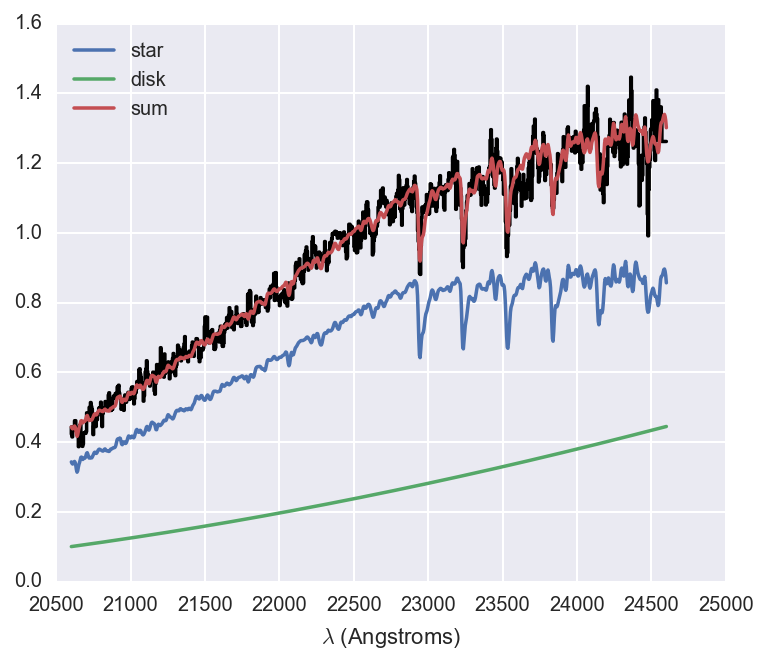

In [13]:
plt.figure(figsize=(6, 5))
plt.step(wl, fl, 'k')
plt.plot(wl, star, label = 'star')
plt.plot(wl, disk, label = 'disk')
plt.plot(wl, star+disk, label = 'sum')
plt.xlabel('$\lambda$ (Angstroms)')
#plt.ylim(0,1.6)
plt.legend(loc='best')

## Veiling factor

/anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


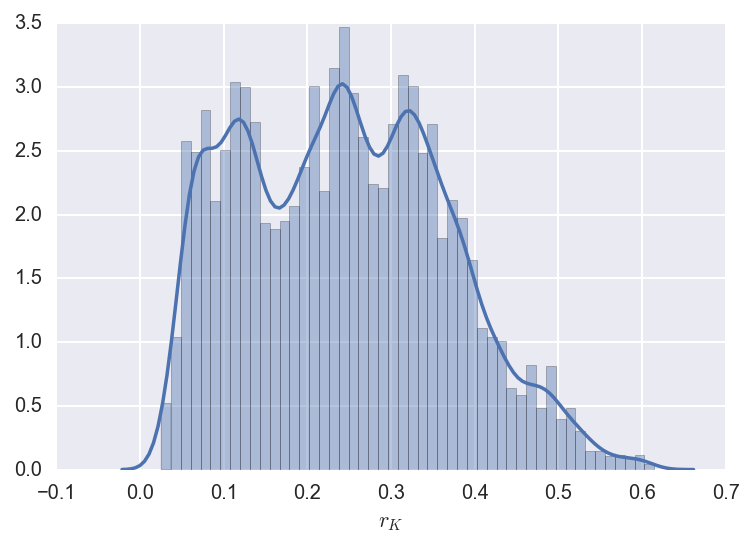

In [14]:
r_K_all = np.median(raw_mods[-1000:,:,1,:]/raw_mods[-1000:,:,0,:], axis=2)
r_K_all_flat = r_K_all.reshape(1000*40)

sns.distplot(r_K_all_flat)
plt.xlabel('$r_K$')

## Solid angle ratio

Compute the ratio of solid angles of disk to star:  
## $\frac{\Omega_d}{\Omega_\star} = \frac{r_d^2 d^2}{r_\star^2 d^2} = \frac{r_d^2}{r_\star^2}$

In [15]:
om_ratio = 10**fc[:, 7]/10**fc[:, 5]

In [16]:
sns.set_context('paper',font_scale=1.8)

In [17]:
sns.set_style('ticks')

/anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


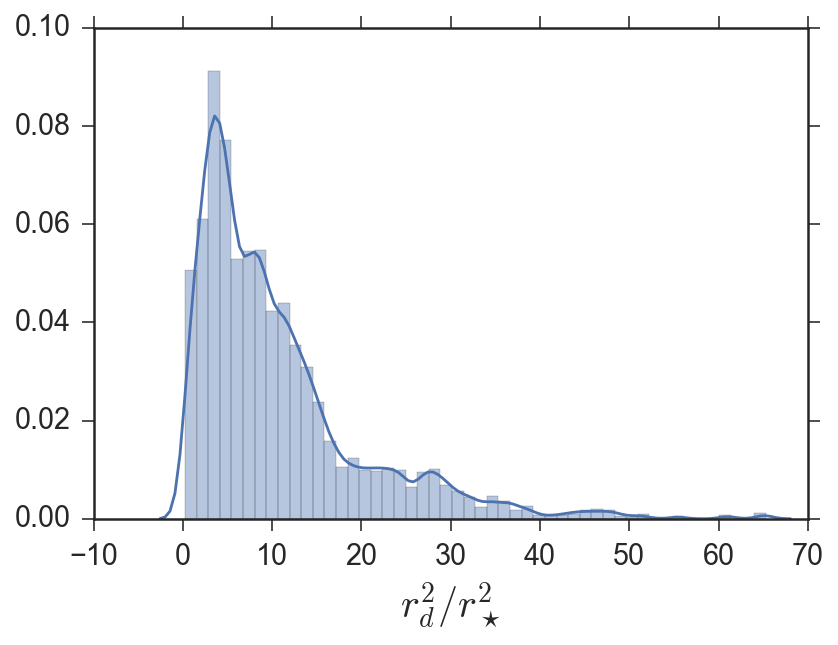

In [18]:
sns.distplot(om_ratio)
plt.xlabel(r'$r_d^2/r_\star^2$', fontsize=20)

Having a warmer disk ($T_{BB}\sim1600$ K instead of $1100$K) means that the emissions region must be smaller ($\Omega_d$ is lower) to provide the same amount of veiling, $r_K$.  The result are some values of the solid angle ratio less than 1, which means the emission region of the disk is smaller than that of the star.  This is not really physical if we think of the disk as larger than the star, but there are still a few scenarios in which a solid angle ratio less than 1 is still physical.  For example, the star is very puffy and we're seeing only a small portion of the disk in a nearly edge-on  (or nearly face-on) ring structure.  In any case, I wouldn't read too-much into the accuracy of these values, and besides the less-than-1 values account for less than 3% of the samples.

In [19]:
np.sum(om_ratio[om_ratio <1])/np.count_nonzero(om_ratio)

0.028558376140204525

/anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


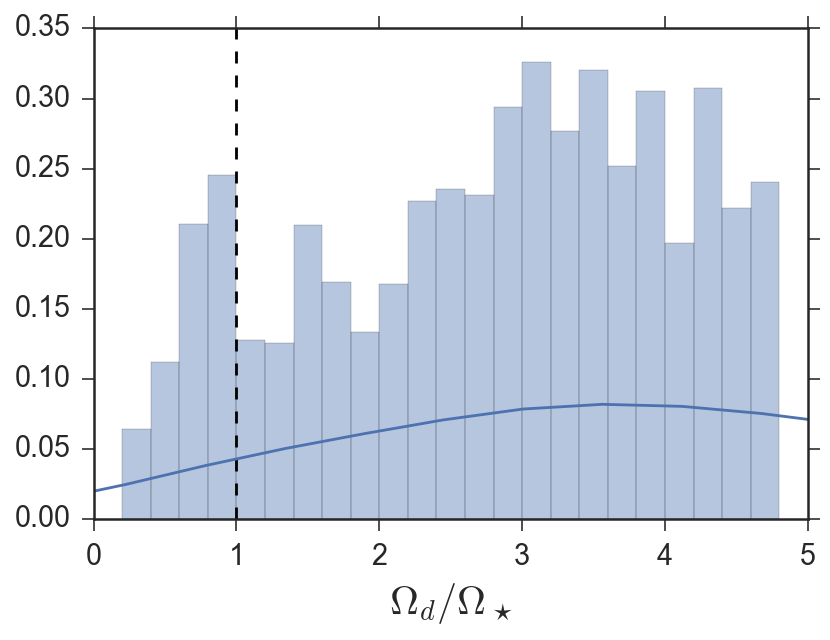

In [20]:
sns.distplot(om_ratio, bins=np.arange(0,5, 0.2))
plt.xlabel(r'$\Omega_d/\Omega_\star$', fontsize=20)
plt.xlim(0,5)
plt.vlines(1.0, 0, 0.35, linestyles='dashed')

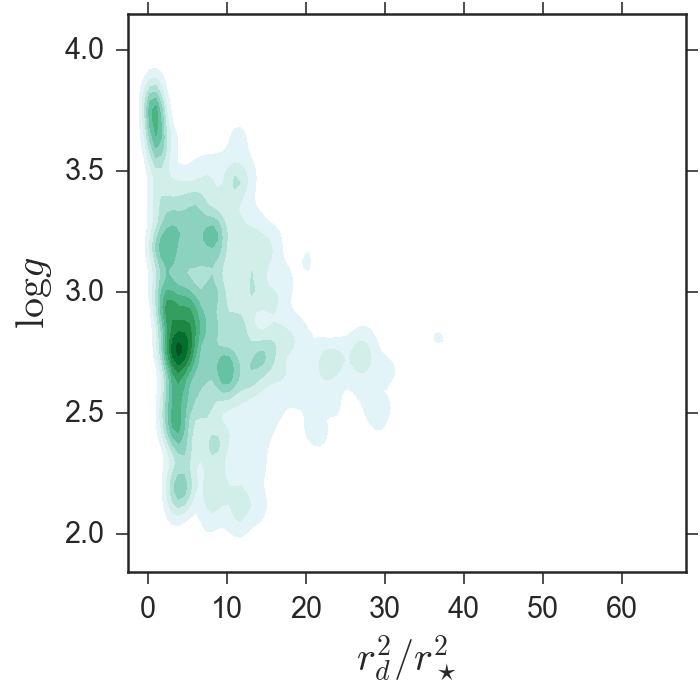

In [21]:
plt.figure(figsize=(5,5))
sns.kdeplot(om_ratio, fc[:,1], shade=True, shade_lowest=False)
plt.xlabel(r'$r_d^2/r_\star^2$', fontsize=20)
plt.ylabel(r'$\log{g}$', fontsize=20)
plt.savefig('../plots/logg_omega_exp3r02.pdf', bbox_inches='tight')

$g = GM/r_\star^2$

In [22]:
import astropy.units as u

In [23]:
import astropy.constants as C

In [24]:
rs = np.arange(1.0, 10.0, 0.1)*u.R_sun

y_vals = (C.G*0.5*u.M_sun/(1.0*rs)**2).to(u.cm/u.s**2).value
x_vals_raw = (0.01*u.AU)**2/((1.0*rs)**2)
x_vals = x_vals_raw.to(u.dimensionless_unscaled)

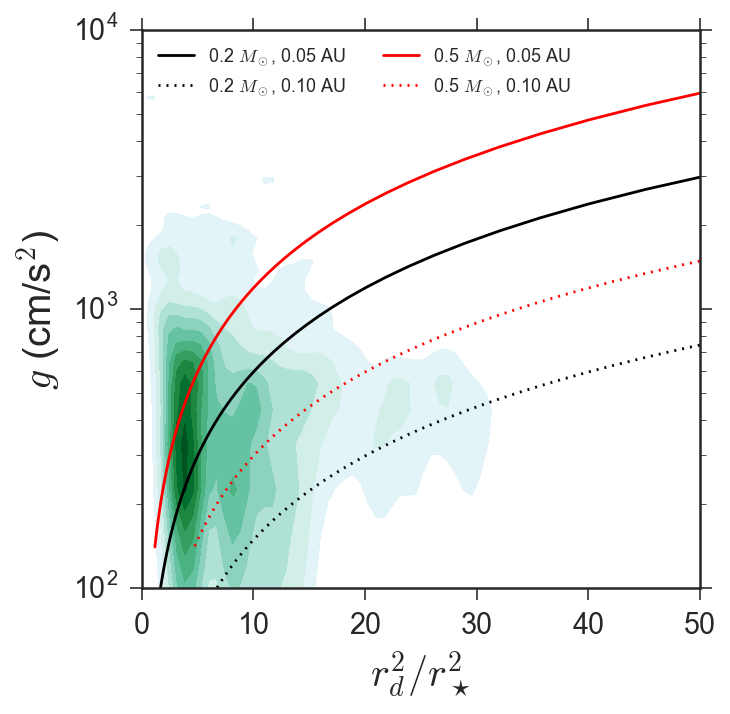

In [25]:
plt.figure(figsize=(5,5))
sns.kdeplot(om_ratio, 10**fc[:,1], shade=True, shade_lowest=False)
plt.xlabel(r'$r_d^2/r_\star^2$', fontsize=20)
plt.ylabel(r'$g$ (cm/s$^2$)', fontsize=20)
plt.yscale('log')
plt.ylim(10**2.0, 10**4.0)
plt.xlim(0.0, 50.0)

convs = {(0,0):'k-',
         (0,1):'k:',
         (1,0):'r-',
         (1,1):'r:'}

for i, ms in enumerate([0.25, 0.5]):
    for j, r_d in enumerate([0.05, 0.10]):
        y_vals = (C.G*1.0*ms*u.M_sun/(1.0*rs)**2).to(u.cm/u.s**2).value
        x_vals_raw = (r_d*u.AU)**2/((1.0*rs)**2)
        x_vals = x_vals_raw.to(u.dimensionless_unscaled)
        plt.plot(x_vals, y_vals, convs[(i,j)],
                 label="{:.1f} $M_\odot$, {:.2f} AU".format(ms, r_d))
        
plt.legend(loc='best', ncol=2, fontsize=9)
plt.savefig('../plots/logg_omega_phys_exp3r02.pdf', bbox_inches='tight')

## The end.